<a href="https://colab.research.google.com/github/mori8/NLP-Pytorch-practice/blob/main/Chpter%201%3A%20%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Chapter 1: 소개

NLP는 언어학 지식에 상관없이 텍스트를 이해하는 통계적인 방법을 사용해 실전 문제를 해결하는 일련의 기술을 말한다.
텍스트의 이해는 계산 가능한 표현으로 변환함으로써 이루어지며, 이 표현은 벡터, 텐서, 그래프, 트리같은 이산적이거나 연속적으로 조합한 구조다.


## 1.1 지도 학습

머신러닝에서 지도 혹은 **지도 학습**은 **샘플**에 대응하는 **타깃(예측하는 값)**의 정답을 제공하는 방식을 말한다. 원하는 정답이 존재하고, 모델을 학습시켜 정답에 가까운 결과를 내도록 만든다.
- 예시 1) 문서 분류 작업에서 샘플 = 문서, 타깃 = 범주형 레이블(스포츠 기사, 악플, 소설 등)
- 예시 2) 기계 번역에서 샘플 = 한 언어의 문장, 타깃 = 다른 언어의 문장 



### 1.2.1 원-핫 표현

0 벡터에서 시작해 문장이나 문서에 등장하는 단어에 상응하는 원소를 1로 설정한다. 어떤 말뭉치의 원-핫 표현은 `총 단어 개수 x 어떤 말뭉치가 포함하고 있는 단어 개수` 크기의 행렬이다. 

[사진 출처(링크)](https://towardsdatascience.com/word-embedding-in-nlp-one-hot-encoding-and-skip-gram-neural-network-81b424da58f2)

![one-hot representation](https://miro.medium.com/max/1400/0*QMGjp-fPYpPaE3eK)

### 1.2.2 TF 표현

> 문서 내에서 이 단어가 얼마나 자주 등장하는가?

소속 단어들의 원-핫 표현을 합해 만든다. 예를 들어 앞에서 언급한 원-핫 인코딩 방식을 사용한 'Fruits flies like time flies a fruit'의 TF 표현은 `[1, 2, 2, 1, 1, 0, 0, 0]` 이며, 각 원소는 해당 단어가 문장(말뭉치)에 등장하는 횟수이다. 단어 $w$의 TF는 $TF(w)$라고 표기한다.

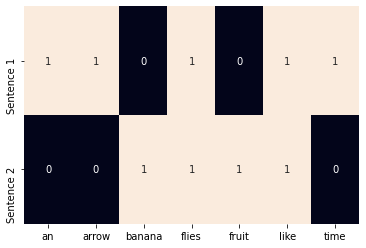

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.',
          'Fruit flies like a banana.'] # NLP 분야에서는 데이터셋을 '말뭉치' 혹은 '코퍼스'라고 부른다.
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

### 1.2.3 TF-IDF 표현

> 다른 문서에서도 자주 등장하는 단어는 중요한 단어가 아니다.</br>
  다른 문서에는 자주 등장하지 않으면서 해당 문서에만 자주 등장하는 단어를 찾자.

다른 문서에서는 찾아보기 힘들고, 해당 문서에만 자주 등장하는 단어는 그 문서의 특징을 잘 나타낸다. 이런 단어를 착기 위해서는 **IDF(역문서 빈도)**를 사용하는 것이 적합하다. 말뭉치 한 개에 대하여 $IDF(w) = log{N/n_w}$으로 정의된다. 여기서 $n_w$는 단어 $w$를 포함한 문서의 개수이며, $N$은 전체 문서 개수이다.

TF-IDF 점수는 TF와 IDF를 곱한 $TF(w) * IDF(w)$이다. 특정 문서에서만(IDF) 자주 등장해야(TF) 주로 발견할 수 있어야 높은 TF-IDF 점수를 얻을 수 있다.

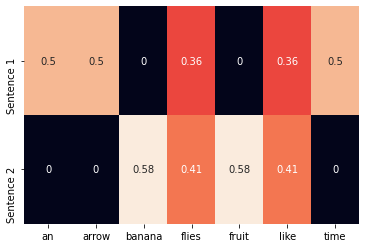

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

### 1.2.4 타깃 인코딩

타깃 변수의 정확한 형태는 풀려는 NLP 문제에 따라 다르다.

- 대부분의 NLP 작업에서 타깃의 형태는 **범주형 레이블**이다. (ex. 언어 모델링)
- 일부 NLP 문제는 주어진 텍스트에서 **수치**를 예측한다.  (ex. 어떤 수필에 대하여 가독성 점수 매기기, 트윗을 보고 사용자의 연령대 예측)

## 1.3 계산 그래프


## 1.4 파이토치 기초

### 1.4.1 파이토치 설치


```
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```


### 1.4.2 텐서 만들기

In [3]:
# 헬퍼 함수 정의. 텐서의 타입과 차원, 값 등의 텐서 속성을 출력한다.
def describe(x):
  print("타입: {0}".format(x.type()))
  print("크기: {0}".format(x.shape))
  print("값: {0}".format(x))

In [4]:
import torch
describe(torch.Tensor(2, 3)) # 텐서의 차원을 지정, 랜덤 초기화

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[6.7034e-10, 3.0925e-41, 3.7835e-44],
        [0.0000e+00,        nan, 1.6255e-43]])


In [4]:
describe(torch.rand(2, 3))  # 균등 분포
describe(torch.randn(2, 3)) # 표준 정규 분포

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0.9006, 0.4772, 0.9488],
        [0.2737, 0.0231, 0.6885]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-0.6236, -1.8377, -0.3770],
        [-1.7423,  0.6620, -2.4051]])


In [5]:
# 동일한 스칼라값으로 채운 텐서 생성
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)

# 밑줄 문자(_)가 있는 파이토치 인-플레이스 메서드는 텐서값을 바꾸는 연산을 의미한다.
# 인-플레이스 메서드는 새로운 객체를 만들지 않고 현잿값을 변경한다.
x.fill_(13)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[13., 13., 13.],
        [13., 13., 13.]])


In [6]:
# 리스트를 사용해 텐서 생성
x = torch.Tensor([[1, 2, 3],
                 [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [7]:
# numpy로 텐서 생성 후 초기화하기
import numpy as np

npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: tensor([[0.0675, 0.3753, 0.8420],
        [0.5249, 0.5926, 0.2465]], dtype=torch.float64)


### 1.4.3 텐서 타입과 크기

In [12]:
# torch.Tensor 생성자를 사용할 때 기본 텐서 타입은 torch.FloatTensor다.
# 텐서 타입은 초기화할 때 지정하거나 나중에 타입 캐스팅 메서드를 사용해 다른 타입(float, long, double)으로 바꿀 수 있다.
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
describe(x)

x = x.long()
describe(x)

x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


### 1.4.4 텐서 연산

텐서는 +, -, *, /을 사용해 연산을 수행할 수 있다.
각 연산자 대신에 이에 대응하는 메서드(`.add()` 등)을 사용할 수도 있다.

In [13]:
# 같은 인덱스에 위치한 텐서끼리 연산 
x = torch.randn(2, 3)
describe(x)

describe(torch.add(x, x))

describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 0.7065, -1.1441,  1.4765],
        [ 0.1030,  0.6939, -0.6692]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 1.4130, -2.2882,  2.9529],
        [ 0.2059,  1.3879, -1.3384]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 1.4130, -2.2882,  2.9529],
        [ 0.2059,  1.3879, -1.3384]])


텐서의 특정 차원에 적용할 수 있는 연산도 있다. 2D 텐서는 행을 차원 0, 열을 차원 1로 표현한다.

In [16]:
# arange() 함수는 0에서 시작해서 지정한 값 이전까지 1씩 증가하는 텐서를 만든다.
x = torch.arange(6)
describe(x)

# view() 메서드는 통일한 데이터를 공유하는 새로운 텐서를 만든다. 
x = x.view(2, 3)
describe(x)

# 열끼리 덧셈
describe(torch.sum(x, dim=0))
# 행끼리 덧셈
describe(torch.sum(x, dim=1))

# 0차원과 1차원을 전치한 텐서 생성
describe(torch.transpose(x, 0, 1))

타입: torch.LongTensor
크기: torch.Size([6])
값: tensor([0, 1, 2, 3, 4, 5])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([3])
값: tensor([3, 5, 7])
타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([ 3, 12])
타입: torch.LongTensor
크기: torch.Size([3, 2])
값: tensor([[0, 3],
        [1, 4],
        [2, 5]])


### 1.4.5 인덱싱, 슬라이싱, 연결

In [17]:
x = torch.arange(6).view(2, 3)
describe(x)

# 두 번 슬라이싱(0번째 행의 1번째 열까지)
describe(x[:1, :2])

describe(x[0, 1])

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([1, 2])
값: tensor([[0, 1]])
타입: torch.LongTensor
크기: torch.Size([])
값: 1


In [24]:
# 복잡한 인덱싱, 연속적이지 않은 텐서 인덱스 참조하기
# 인덱스는 LongTensor여야 함
indices = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indices))

indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: tensor([[0, 2],
        [3, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [0, 1, 2]])
타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 4])


In [25]:
# 텐서 연결
x = torch.arange(6).view(2, 3)
describe(x)

describe(torch.cat([x, x], dim=0))

describe(torch.cat([x, x], dim=1))

describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([4, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 6])
값: tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [27]:
# 행렬 곱셈
x1 = torch.arange(6).view(2, 3)
describe(x1)

x2 = torch.ones(3, 2).long()
x2[:, 1] += 1
describe(x2)

describe(torch.mm(x1, x2))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([3, 2])
값: tensor([[1, 2],
        [1, 2],
        [1, 2]])
타입: torch.LongTensor
크기: torch.Size([2, 2])
값: tensor([[ 3,  6],
        [12, 24]])


### 1.4.6 텐서와 계산 그래프

PyTorch의 tensor 클래스는 데이터와 대수 연산, 인덱싱, 크기 변경 같은 다양한 연산을 캡슐화한다.
텐서의 `required_grad` 매개변수를 `True`로 지정하면 그레디언트 기반 학습에 필요한 손실 함수와 텐서의 그레디언트를 기록하는 부가 연산을 활성화한다.

먼저 파이토치가 정방향 계산의 값을 기록한다. 계산이 끝나면 스칼라값 하나를 사용해 역방향 계산을 수행한다. 역방향 계산은 손실 함수의 평과 결과로 얻은 텐서에서 `backward()` 메서드를 호출해 시작한다. 역방향 계산은 정방향 계산에 참여한 텐서 객체에 대한 그레디언트 값을 계산한다.

일반적으로 그레디언트는 함수 입력에 대한 함수 출력의 기울기를 나타내는 값이다. 계산 그래프에서 그레이디언트는 모델의 파라미터마다 존재하고 오류 신호에 대한 파라미터의 기여도로 생각할 수 있다. 파이토치에서 계산 그래프에 있는 노드에 대한 그레이디언트를 `.grad` 속성으로 참조할 수 있으며, 옵티마이저는 `.grad` 속성을 사용해서 파라미터값을 업데이트한다.

In [30]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True
타입: torch.FloatTensor
크기: torch.Size([])
값: 21.0
False


### 1.4.7 CUDA 텐서

CUDA 텐서를 사용하면 GPU를 활용할 수 있다.

In [5]:
print(torch.cuda.is_available()) 

True


In [7]:
# 바람직한 방법: 장치에 무관한 텐서 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

x = torch.rand(3, 3).to(device)
describe(x)

cuda
타입: torch.cuda.FloatTensor
크기: torch.Size([3, 3])
값: tensor([[0.0253, 0.2698, 0.0244],
        [0.9704, 0.1401, 0.6587],
        [0.4778, 0.2507, 0.5568]], device='cuda:0')


CUDA 객체와 CUDA가 아닌 객체를 다루려면 두 객체가 같은 장치에 있는지 확인해야 한다. 서로 다른 장치에 있는 객체를 동시에 다루려고 하면 오류가 발생한다.

GPU로 데이터를 넣고 꺼내는 작업은 비용이 많이 든다. 따라서 병렬 계산은 일반적으로 GPU에서 수행하고 최종 결과만 CPU로 전송하는 방식으로 이루어진다. 이렇게 하면 GPU를 최대로 활용할 수 있다.